In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data and Main Data Properties

Data file is stored using lfs (Large File System), but acts like any regular file.

File is actually tab separated.  Pandas appears to handle fine but need to specify multiple whitespace as the
separator.

In [2]:
data_file = '../data/brm-bixler-dmello-fixation-statistics.csv'

d = pd.read_csv(data_file, sep='\t')

In [3]:
print('Number of features:', len(d.columns))
print('Number of observations:', len(d))

Number of features: 129
Number of observations: 4076


In [4]:
pd.set_option('display.max_columns', 200) # so we can see head of all columns here
d.head(10)

,ParticipantID,TrialID,TrialIndex,SegmentID,SegmentIndex,StartTime(ms),EndTime(ms),Length(ms),StartTimestamp,EndTimestamp,StartTimeGMT,EndTimeGMT,ValidityRate,PageFixations,WindowFixations,PageBlinks,WindowBlinks,BottomWindowBound_Page,TopWindowBound_Page,BottomWindowBound_Session,TopWindowBound_Session,NumberOfReports,FirstReportType,FirstReportContent,FirstReportTimestamp,FirstReportTimesGMT,FirstReportSessionTime(ms),FirstReportTrialTime(ms),FirstReportSegmentTime(ms),FixDurN,FixDurMed,FixDurMean,FixDurSD,FixDurMin,FixDurMax,FixDurRange,FixDurSkew,FixDurKur,FxDisp,SacDurN,SacDurMed,SacDurMean,SacDurSD,SacDurMin,SacDurMax,SacDurRange,SacDurSkew,SacDurKur,SacAmpN,SacAmpMed,SacAmpMean,SacAmpSD,SacAmpMin,SacAmpMax,SacAmpRange,SacAmpSkew,SacAmpKur,SacAngAbsN,SacAngAbsMed,SacAngAbsMean,SacAngAbsSD,SacAngAbsMin,SacAngAbsMax,SacAngAbsRange,SacAngAbsSkew,SacAngAbsKur,SacAngRelN,SacAngRelMed,SacAngRelMean,SacAngRelSD,SacAngRelMin,SacAngRelMax,SacAngRelRange,SacAngRelSkew,SacAngRelKur,SacVelN,SacVelMed,SacVelMean,SacVelSD,SacVelMin,SacVelMax,SacVelRange,SacVelSkew,SacVelKur,horizontalSaccadeProp,FxSacRatio,BlinkDurN,BlinkDurMed,BlinkDurMean,BlinkDurSD,BlinkDurMin,BlinkDurMax,BlinkDurRange,BlinkDurSkew,BlinkDurKur,PupilDiametersZN,PupilDiametersZMed,PupilDiametersZMean,PupilDiametersZSD,PupilDiametersZMin,PupilDiametersZMax,PupilDiametersZRange,PupilDiametersZSkew,PupilDiametersZKur,FirstPassFixDurMean,FirstPassFixDurSD,FirstPassFixProp,EndOfClauseFixDurMean,EndOfClauseFixDurSD,EndOfClauseFixProp,RegFixDurMean,RegFixDurSD,RegFixProp,SingleFixDurMean,SingleFixDurSD,SingleFixProp,NoWordFixDurMean,NoWordFixDurSD,NoWordFixProp,GazeFixDurMean,GazeFixDurSD,GazeFixProp,WordSkipProp,propCrossLineSaccades,readingDepth,WordLenToFixDurCorr,FreqToFixDurCorr,NumSynsToFixDurCorr,HypDepthToFixDurCorr
0,BE7-P1002-Memphis,MainText,1,NaN,57,1294808,1322271,27463,1.382120e+12,1.382120e+12,46:38.0,47:05.5,0.873786,100,11,7,0,12650,16650,1307458,1311458,0,none,none,NaN,NaN,NaN,NaN,NaN,11,200.0,221.000000,101.294620,83,366,283.0,0.132989,-1.389706,0.429,10,17.0,123.300000,162.960834,16,450.0,434,1.244961,0.053705,10.0,132.924202,210.010957,210.956418,80.856303,793.888636,713.032333,2.860900,8.535334,10,352.773596,232.045048,168.309166,0.289026,359.406308,359.117281,-0.725668,-1.670323,9,353.875658,240.549308,174.528607,4.791021,359.971189,355.180168,-0.857144,-1.710707,10,6.684761,5.484460,3.703560,0.407012,10.050112,9.643100,-0.457247,-1.396898,1.000000,1.972,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,-1.362156,-1.458751,0.415926,-2.365184,-0.868433,1.496751,-0.302367,-1.148603,261,102.0,0.55,NaN,NaN,0.0,NaN,NaN,0.00,290.0,83.0,0.45,164.0,80.0,0.55,163.0,89.0,0.45,0.636364,0.100000,153.0,-0.375,-0.223,0.404,-0.560
1,BE7-P1002-Memphis,MainText,1,NaN,56,1274590,1294808,20218,1.382120e+12,1.382120e+12,46:17.8,46:38.0,0.839242,72,11,4,0,12650,16650,1287240,1291240,0,none,none,NaN,NaN,NaN,NaN,NaN,11,183.0,209.090909,107.757556,133,499,366.0,2.241717,5.662505,0.436,10,25.5,104.800000,145.311772,16,383.0,367,1.609426,1.031941,10.0,155.985073,274.138920,289.943023,66.923698,926.600337,859.676639,1.787491,2.228981,10,174.196626,179.839838,166.849182,2.679970,359.925463,357.245493,0.031703,-2.129207,9,351.088886,198.966328,183.765405,3.750852,359.611378,355.860527,-0.270329,-2.570038,10,4.602806,5.216583,3.525370,0.660415,11.163859,10.503445,0.681916,-0.361619,1.000000,2.195,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,-0.200080,-0.211293,0.297847,-0.938658,0.475580,1.414238,-0.449710,-0.030409,209,120.0,0.82,NaN,NaN,0.0,133.0,NaN,0.09,208.0,128.0,0.73,134.0,NaN,0.09,200.0,23.0,0.18,1.384615,0.200000,60.0,0.058,NaN,-0.078,-0.657
2,BE7-P1002-Memphis,MainText,1,NaN,55,1251125,1274590,23465,1.382120e+12,1.382120e+12,45:54.3,46:17.8,0.762784,73,13,4,0,12650,16650,1263775,1267775,0,none,none,NaN,NaN,NaN,NaN,NaN,13,167.0,188.538462,100.261006,83,416,333.0,1.010131,0.510088,0.554,12,42.0,120.500000,158.185449,16,466.0,450,1.434272,0.694127,12.0,118.155517,256.603244,288.874145,66.58

In [5]:
for (id, column) in enumerate(d.columns):
    print('%03d) %s' % (id, column))

000) ParticipantID
001) TrialID
002) TrialIndex
003) SegmentID
004) SegmentIndex
005) StartTime(ms)
006) EndTime(ms)
007) Length(ms)
008) StartTimestamp
009) EndTimestamp
010) StartTimeGMT
011) EndTimeGMT
012) ValidityRate
013) PageFixations
014) WindowFixations
015) PageBlinks
016) WindowBlinks
017) BottomWindowBound_Page
018) TopWindowBound_Page
019) BottomWindowBound_Session
020) TopWindowBound_Session
021) NumberOfReports
022) FirstReportType
023) FirstReportContent
024) FirstReportTimestamp
025) FirstReportTimesGMT
026) FirstReportSessionTime(ms)
027) FirstReportTrialTime(ms)
028) FirstReportSegmentTime(ms)
029) FixDurN
030) FixDurMed
031) FixDurMean
032) FixDurSD
033) FixDurMin
034) FixDurMax
035) FixDurRange
036) FixDurSkew
037) FixDurKur
038) FxDisp
039) SacDurN
040) SacDurMed
041) SacDurMean
042) SacDurSD
043) SacDurMin
044) SacDurMax
045) SacDurRange
046) SacDurSkew
047) SacDurKur
048) SacAmpN
049) SacAmpMed
050) SacAmpMean
051) SacAmpSD
052) SacAmpMin
053) SacAmpMax
054) Sac

# Removal by Hand of Unneded Features

Many features are obviously not needed for a ML model, like participant ids and trial ids, etc.  Lets just remove
those from the start.

In [6]:
# The first 12 columns are simply time stamps and ids, we don't need these
cols = d.columns[:12].tolist()
print(cols)


d = d.drop(columns=cols)
print(d.columns.tolist())
print('Number of features:', len(d.columns))

['ParticipantID', 'TrialID', 'TrialIndex', 'SegmentID', 'SegmentIndex', 'StartTime(ms)', 'EndTime(ms)', 'Length(ms)', 'StartTimestamp', 'EndTimestamp', 'StartTimeGMT', 'EndTimeGMT']
['ValidityRate', 'PageFixations', 'WindowFixations', 'PageBlinks', 'WindowBlinks', 'BottomWindowBound_Page', 'TopWindowBound_Page', 'BottomWindowBound_Session', 'TopWindowBound_Session', 'NumberOfReports', 'FirstReportType', 'FirstReportContent', 'FirstReportTimestamp', 'FirstReportTimesGMT', 'FirstReportSessionTime(ms)', 'FirstReportTrialTime(ms)', 'FirstReportSegmentTime(ms)', 'FixDurN', 'FixDurMed', 'FixDurMean', 'FixDurSD', 'FixDurMin', 'FixDurMax', 'FixDurRange', 'FixDurSkew', 'FixDurKur', 'FxDisp', 'SacDurN', 'SacDurMed', 'SacDurMean', 'SacDurSD', 'SacDurMin', 'SacDurMax', 'SacDurRange', 'SacDurSkew', 'SacDurKur', 'SacAmpN', 'SacAmpMed', 'SacAmpMean', 'SacAmpSD', 'SacAmpMin', 'SacAmpMax', 'SacAmpRange', 'SacAmpSkew', 'SacAmpKur', 'SacAngAbsN', 'SacAngAbsMed', 'SacAngAbsMean', 'SacAngAbsSD', 'SacAngAbs

# Feature Cleaning

Lets first look at missing data and handle or drop as needed.

In [7]:
# this is the counts of the missing volumns in each feature/column
pd.set_option('display.max_rows', 200) # so we can see head of all columns here

# see which column/features have missing values
d.isnull().sum()

ValidityRate                     0
PageFixations                    0
WindowFixations                  0
PageBlinks                       0
WindowBlinks                     0
BottomWindowBound_Page           0
TopWindowBound_Page              0
BottomWindowBound_Session        0
TopWindowBound_Session           0
NumberOfReports                  0
FirstReportType                  0
FirstReportContent               0
FirstReportTimestamp          2963
FirstReportTimesGMT           4076
FirstReportSessionTime(ms)    2963
FirstReportTrialTime(ms)      2963
FirstReportSegmentTime(ms)    2963
FixDurN                          0
FixDurMed                        0
FixDurMean                       0
FixDurSD                         0
FixDurMin                        0
FixDurMax                        0
FixDurRange                      0
FixDurSkew                       0
FixDurKur                        0
FxDisp                           0
SacDurN                          0
SacDurMed           

The FirstReport items probably aren't needed.  The GMT can be dropped, no data.  But The TimeStamp and the others
that have 2963 missing values are features that are only filled in for the trials where mind wandering was reported.
We probably don't need any of these, so we will remove them.

In [8]:
cols = ['FirstReportTimestamp', 'FirstReportTimesGMT', 
        'FirstReportSessionTime(ms)', 'FirstReportTrialTime(ms)', 
        'FirstReportSegmentTime(ms)']
d = d.drop(columns=cols)
print('Number of features:', len(d.columns))

Number of features: 112


The remaining missing values will need to be looked at individuall and in more detail.

**Blink Duration**

Not sure what there would be a different number of missing for the various blink duration summaries.  I would expect
them all to be the same, e.g. if we had 2260 trials where blinks were observed, we should be able to calculate
the median, mean, etc for these.

Lets look at BlinkDurN first.

In [9]:
d['BlinkDurN'].describe()

count    4076.000000
mean        0.654503
std         0.888403
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         6.000000
Name: BlinkDurN, dtype: float64

There were from 0 to 6 blinks, and by far many were 0 (75 percentile was 1 meaning some 50 to 75% of these trials
had 0 blinks.  I would have guessed that if 0 blinks, then you couldn't measure mean, sd, etc.  Lets turn
into categorical variable so see distribution of the blink count N's.

In [10]:
# the values in BlinkDurN were read in as floats, but they are whole number integers,
# lets convert them so easier to work with
d['BlinkDurN'] = d['BlinkDurN'].astype(int)
d['BlinkDurN'].value_counts()

0    2276
1    1194
2     430
3     138
4      28
5       9
6       1
Name: BlinkDurN, dtype: int64

There were actually 2276 trials where 0 blinks occurred.  That means there are

In [11]:
x = d['BlinkDurN'].value_counts()
x[1:].sum()

1800

1800 trials with 1 or more blinks.  I was expecting there were going to be 2260 items with 0 blinks, so its a bit
of a mystery why they don't match.  Lets compare the N to BlinkDurMean

In [12]:
d[['BlinkDurN', 'BlinkDurMean']].head(20)

,BlinkDurN,BlinkDurMean
0,0,NaN
1,0,NaN
2,0,NaN
3,3,161.333333
4,1,233.000000
5,0,NaN
6,3,222.333333
7,2,166.500000
8,0,NaN
9,1,267.000000


So yes when 0 blinks that seems to usually be where data is missing for the mean.  I wonder which trials
had a N of 0 but some value for the mean, had to be 16?

In [13]:
rows = d[ (d.BlinkDurN == 0) & (d.BlinkDurMean.notnull()) ]
rows[['BlinkDurN', 'BlinkDurMean']]

,BlinkDurN,BlinkDurMean
298,0,92.0
299,0,183.0
307,0,117.0
1155,0,116.0
1438,0,250.0
1441,0,249.0
1463,0,217.0
1876,0,166.0
2516,0,216.0
3722,0,391.0


So yes there were 16 of these as I thought.  These are mysterious, it is not clear how a mean can be computed
where there were 0 blinks recorded.  These may reflect some times where a blink was occurring over a window
boundary?

I'm inclined not to worry too much about these, though I do want to look at one more.  BlinkDurKur
(which is a measure of [Kurtosis](https://en.wikipedia.org/wiki/Kurtosis), I believe) were almost
all missing, I wonder which values of N correspond to the non missing values?

In [14]:
rows = d[ (d.BlinkDurKur.notnull()) ]
rows[['BlinkDurN', 'BlinkDurKur']]


,BlinkDurN,BlinkDurKur
238,4,-1.152184
567,5,-1.657116
570,4,2.563142
581,5,2.752289
585,4,-0.800742
586,6,0.725139
588,5,-2.862547
598,4,1.603736
600,5,-0.644352
604,5,2.675767


In [15]:
print(len(rows[['BlinkDurN', 'BlinkDurKur']]))
print(len(d[ (d.BlinkDurN >= 4) ]))

40
38


I guess Kurtosis might need more than 2 or 3 values to calculate.  There we 38 trials with 4, 5 or 6 blinks, and
40 values show up here, though there were 3 trials with 3 blinks. But basically it is mostly just the 4, 5 and 6
blinks with a Kurtosis measure, which mostly answers my qustion on why this had so many missing.  Probably a 
similar reason for missing for the skew measure.

In general, I think it is reasonable to say that if there were 0 blinks, then the mean, median, etc. blink
duration is 0, and fill in all of the missing values with 0.  The columns with lots of 0 values will probably
then get removed when we select on importance or variance of the feature, since lots of similar values means
little information in the feature.

Lets fill in all BlinkDur missing values with 0's

In [16]:
# this is one method to fill na values for specific columns
values = {
    'BlinkDurMed': 0,
    'BlinkDurMean': 0,
    'BlinkDurSD': 0,
    'BlinkDurMin': 0,
    'BlinkDurMax': 0,
    'BlinkDurRange': 0,
    'BlinkDurSkew': 0,
    'BlinkDurKur': 0
}

d = d.fillna(value=values)

In [17]:
# see which column/features have missing values
d.isnull().sum()

ValidityRate                    0
PageFixations                   0
WindowFixations                 0
PageBlinks                      0
WindowBlinks                    0
BottomWindowBound_Page          0
TopWindowBound_Page             0
BottomWindowBound_Session       0
TopWindowBound_Session          0
NumberOfReports                 0
FirstReportType                 0
FirstReportContent              0
FixDurN                         0
FixDurMed                       0
FixDurMean                      0
FixDurSD                        0
FixDurMin                       0
FixDurMax                       0
FixDurRange                     0
FixDurSkew                      0
FixDurKur                       0
FxDisp                          0
SacDurN                         0
SacDurMed                       0
SacDurMean                      0
SacDurSD                        0
SacDurMin                       0
SacDurMax                       0
SacDurRange                     0
SacDurSkew    

**FirstPassFixDur**

I am not completely sure what FirstPassFixDur might be measuring.  There were only 15 missing values for the SD
(standard deviation, I'm sure).  Lets see if these look like they are related to just FixDur

In [18]:
rows = d[ (d.FirstPassFixDurSD.isnull()) ]
rows[['FixDurN', 'FirstPassFixDurSD']]


,FixDurN,FirstPassFixDurSD
358,8,NaN
369,10,NaN
371,8,NaN
378,12,NaN
3091,10,NaN
3092,10,NaN
3093,13,NaN
3094,10,NaN
3095,15,NaN
3096,8,NaN


I guess we do need to know something about the N count of the fixation durations to see if these are unusual
numbers or not.  Lets look at the frequency table of the FixDurN counts:

In [19]:
d['FixDurN'].value_counts()

13    554
12    537
14    530
11    441
15    400
10    352
9     279
16    250
8     216
7     168
17    137
6     117
18     58
19     21
20     14
21      2
Name: FixDurN, dtype: int64

In [20]:
d['FixDurN'].value_counts().sort_index()

6     117
7     168
8     216
9     279
10    352
11    441
12    537
13    554
14    530
15    400
16    250
17    137
18     58
19     21
20     14
21      2
Name: FixDurN, dtype: int64

That didn't help too much, the values that are missing are kind of in the middle.  It might be that the 
FirstPassFixDur are not really related to the FixDur values?  I guess we could try and see their correlation.

In [21]:
print(d['FixDurN'].corr(d['FirstPassFixDurSD']))
print(d['FixDurSD'].corr(d['FirstPassFixDurSD']))


-0.4317852202332472
0.8508652323693565


The SD do seem pretty highly correlated.  Perhaps we should just use the FixDurSD for the missing FirstPassFixDurSD?


In [22]:
d[['FixDurSD', 'FirstPassFixDurSD']]

,FixDurSD,FirstPassFixDurSD
0,101.294620,102.0
1,107.757556,120.0
2,100.261006,107.0
3,125.994156,94.0
4,41.252732,41.0
5,47.959184,44.0
6,57.608569,60.0
7,59.122010,58.0
8,87.227990,81.0
9,85.264721,86.0


In [23]:
# fill in the missing FirstPassFixDurSD with the values from the FixDurSD
d.FirstPassFixDurSD.fillna(d.FixDurSD, inplace=True)

In [24]:
# see which column/features have missing values
d.isnull().sum()

ValidityRate                    0
PageFixations                   0
WindowFixations                 0
PageBlinks                      0
WindowBlinks                    0
BottomWindowBound_Page          0
TopWindowBound_Page             0
BottomWindowBound_Session       0
TopWindowBound_Session          0
NumberOfReports                 0
FirstReportType                 0
FirstReportContent              0
FixDurN                         0
FixDurMed                       0
FixDurMean                      0
FixDurSD                        0
FixDurMin                       0
FixDurMax                       0
FixDurRange                     0
FixDurSkew                      0
FixDurKur                       0
FxDisp                          0
SacDurN                         0
SacDurMed                       0
SacDurMean                      0
SacDurSD                        0
SacDurMin                       0
SacDurMax                       0
SacDurRange                     0
SacDurSkew    

**EndOfClause**

A lot of the EndOfClause measures are missing.  There are only 4067 out of 4076 measures of SD.  These
features are probably useless, no real data in them to use.  But what is in the EndOfClauseFixProp?

In [25]:
d['EndOfClauseFixProp'].describe()

count    4076.000000
mean        0.000895
std         0.010781
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.250000
Name: EndOfClauseFixProp, dtype: float64

In [26]:
d['EndOfClauseFixProp'].value_counts()

0.00    4042
0.08       8
0.06       6
0.07       3
0.09       3
0.17       2
0.12       2
0.10       2
0.14       1
0.11       1
0.15       1
0.21       1
0.18       1
0.13       1
0.22       1
0.25       1
Name: EndOfClauseFixProp, dtype: int64

Three are 4042 0's here, which corresponds with the 4042 missing values in mean.  Then just 34 actual values.
I'm inclined to just drop all 3 of these because of no real data.

In [27]:
cols = ['EndOfClauseFixDurMean', 'EndOfClauseFixDurSD', 'EndOfClauseFixProp']
d = d.drop(columns=cols)

In [28]:
# see which column/features have missing values
d.isnull().sum()

ValidityRate                    0
PageFixations                   0
WindowFixations                 0
PageBlinks                      0
WindowBlinks                    0
BottomWindowBound_Page          0
TopWindowBound_Page             0
BottomWindowBound_Session       0
TopWindowBound_Session          0
NumberOfReports                 0
FirstReportType                 0
FirstReportContent              0
FixDurN                         0
FixDurMed                       0
FixDurMean                      0
FixDurSD                        0
FixDurMin                       0
FixDurMax                       0
FixDurRange                     0
FixDurSkew                      0
FixDurKur                       0
FxDisp                          0
SacDurN                         0
SacDurMed                       0
SacDurMean                      0
SacDurSD                        0
SacDurMin                       0
SacDurMax                       0
SacDurRange                     0
SacDurSkew    

A note about the EndOfClause and the following features.  These do appear to be some engineered features that
the original experimenters tried to specifically measure.  We should try to keep them if we can.  There were
just to many missing EndOfClause measures that they don't seem useful.  But most of the remaining, while some
have quite a few missing values, are only less than half at most usually, so we should probably try
and fill in the missing values.

**RegFix**

The RegFix don't have quite so much missing as the previous measure.  Lets look at the frequency of the values
in the Prop feature.

In [29]:
d.RegFixProp.value_counts().sort_index()

0.00    965
0.05      5
0.06    103
0.07    273
0.08    351
0.09    154
0.10    142
0.11    151
0.12    191
0.13    103
0.14    203
0.15    152
0.16      4
0.17    194
0.18    132
0.19     42
0.20    133
0.21    105
0.22     64
0.23     83
0.24      8
0.25    124
0.26      3
0.27     86
0.28      4
0.29     65
0.30     30
0.31     37
0.32      2
0.33     76
0.35      2
0.36     22
0.38     21
0.39      1
0.40     11
0.42      5
0.43      7
0.44      5
0.45      6
0.46      1
0.50      6
0.56      1
0.57      1
0.67      1
0.69      1
Name: RegFixProp, dtype: int64

So the 965 0 measures corresponds with the missing values exactly for the mean.  We could do something simple
and simply fill in with the mean (of the mean).  Or maybe it would be better to use the average of the closest
values of Mean from the Prop measure?

Lets first just confirm that the 965 missing do exactly correspond to the 0.0 measures of the Prop

In [30]:
rows = d[ (d.RegFixDurMean.isnull()) ]
rows[['RegFixProp', 'RegFixDurMean']]

,RegFixProp,RegFixDurMean
0,0.0,NaN
2,0.0,NaN
5,0.0,NaN
25,0.0,NaN
29,0.0,NaN
30,0.0,NaN
36,0.0,NaN
38,0.0,NaN
39,0.0,NaN
45,0.0,NaN


Lets see what the average SD and Mean are when we group by the Prop


In [31]:
g = d.groupby('RegFixProp')
g[['RegFixDurMean', 'RegFixDurSD']].mean()

,RegFixDurMean,RegFixDurSD
RegFixProp,,
0.00,NaN,NaN
0.05,176.800000,NaN
0.06,190.174757,NaN
0.07,222.633700,NaN
0.08,242.490028,NaN
0.09,242.279221,NaN
0.10,286.415493,34.200000
0.11,273.152318,27.958333
0.12,254.214660,52.771429


Ok thats useful.  All of the missing for the SD are also related to the smallest values of Prop. 

I'm not sure if its best, but lets just fill in the missing values with the closest average
value, so fill in all of the missing Mean with the 176.800000 from Prop=0.05 and all of the SD
with the 34.200000 from Prop=0.10

In [32]:
# fill in the missing RegFixDurMean values
t = g[['RegFixDurMean', 'RegFixDurSD']].mean()
value_to_fill = t.loc[0.05, 'RegFixDurMean']
print(value_to_fill)

values = {
    'RegFixDurMean': value_to_fill,
}

d = d.fillna(value=values)

176.8


In [33]:
value_to_fill = t.loc[0.10, 'RegFixDurSD']
print(value_to_fill)

values = {
    'RegFixDurSD': value_to_fill,
}

d = d.fillna(value=values)

34.2


In [34]:
# see which column/features have missing values
d.isnull().sum()

ValidityRate                    0
PageFixations                   0
WindowFixations                 0
PageBlinks                      0
WindowBlinks                    0
BottomWindowBound_Page          0
TopWindowBound_Page             0
BottomWindowBound_Session       0
TopWindowBound_Session          0
NumberOfReports                 0
FirstReportType                 0
FirstReportContent              0
FixDurN                         0
FixDurMed                       0
FixDurMean                      0
FixDurSD                        0
FixDurMin                       0
FixDurMax                       0
FixDurRange                     0
FixDurSkew                      0
FixDurKur                       0
FxDisp                          0
SacDurN                         0
SacDurMed                       0
SacDurMean                      0
SacDurSD                        0
SacDurMin                       0
SacDurMax                       0
SacDurRange                     0
SacDurSkew    

**SingleFix**

Again not sure what the SingleFixProp and its mean and sd are measuring here, but there were not very many
missing values for this measure.  Lets look at the frequencey of the Prop

In [35]:
d.SingleFixProp.value_counts().sort_index()

0.00     20
0.06      1
0.07      4
0.08      5
0.09      5
0.10      8
0.11      6
0.12      7
0.13      2
0.14     10
0.15      6
0.17     18
0.18     14
0.19      4
0.20     18
0.21     14
0.22     13
0.23     22
0.24      3
0.25     44
0.27     27
0.28      4
0.29     56
0.30     30
0.31     52
0.33    113
0.35      6
0.36     90
0.37      1
0.38    101
0.39      6
0.40     95
0.41     13
0.42     58
0.43     80
0.44     66
0.45     76
0.46     79
0.47     57
0.50    350
0.53     67
0.54    105
0.55     63
0.56    110
0.57    112
0.58     78
0.59     15
0.60    145
0.61      6
0.62    135
0.63      2
0.64    153
0.65     15
0.67    223
0.68      5
0.69     91
0.70     26
0.71    136
0.72      6
0.73     82
0.75    132
0.76     17
0.77     24
0.78     72
0.79     35
0.80     84
0.81      9
0.82     74
0.83     67
0.85     60
0.86     47
0.87     23
0.88     20
0.89      2
0.90      1
1.00    250
Name: SingleFixProp, dtype: int64

Again the 20 0.0 measures here are probably the missing values for SD, and like before the missing for Mean are also
all from the lowest values of the Prop measure.  Lets look at the average when grouping by the prop.

In [36]:
g = d.groupby('SingleFixProp')
g[['SingleFixDurMean', 'SingleFixDurSD']].mean()

,SingleFixDurMean,SingleFixDurSD
SingleFixProp,,
0.00,NaN,NaN
0.06,192.000000,NaN
0.07,220.750000,NaN
0.08,370.000000,NaN
0.09,256.600000,NaN
0.10,197.750000,NaN
0.11,248.333333,NaN
0.12,284.285714,47.000000
0.13,202.000000,38.000000


And again here we will fill in missing with the closest value we found by the Prop group.

In [37]:
# fill in the missing SingleFixDurMean and SingleFixDurSD values
t = g[['SingleFixDurMean', 'SingleFixDurSD']].mean()
mean_value_to_fill = t.loc[0.06, 'SingleFixDurMean']
print(mean_value_to_fill)
sd_value_to_fill = t.loc[0.12, 'SingleFixDurSD']
print(sd_value_to_fill)

values = {
    'SingleFixDurMean': mean_value_to_fill,
    'SingleFixDurSD': sd_value_to_fill
}

d = d.fillna(value=values)

192.0
47.0


In [38]:
# see which column/features have missing values
d.isnull().sum()

ValidityRate                    0
PageFixations                   0
WindowFixations                 0
PageBlinks                      0
WindowBlinks                    0
BottomWindowBound_Page          0
TopWindowBound_Page             0
BottomWindowBound_Session       0
TopWindowBound_Session          0
NumberOfReports                 0
FirstReportType                 0
FirstReportContent              0
FixDurN                         0
FixDurMed                       0
FixDurMean                      0
FixDurSD                        0
FixDurMin                       0
FixDurMax                       0
FixDurRange                     0
FixDurSkew                      0
FixDurKur                       0
FxDisp                          0
SacDurN                         0
SacDurMed                       0
SacDurMean                      0
SacDurSD                        0
SacDurMin                       0
SacDurMax                       0
SacDurRange                     0
SacDurSkew    

**NoWordFix**

**GazeFix**

I am going to handle NoWordFix and GazeFix missing values in the same way.

In [39]:
g = d.groupby('NoWordFixProp')
g[['NoWordFixDurMean', 'NoWordFixDurSD']].mean()

,NoWordFixDurMean,NoWordFixDurSD
NoWordFixProp,,
0.00,NaN,NaN
0.05,139.250000,NaN
0.06,191.868421,NaN
0.07,221.073770,NaN
0.08,223.502674,NaN
0.09,250.617978,NaN
0.10,251.822222,NaN
0.11,258.653061,42.000000
0.12,223.524194,47.492958


In [40]:
# fill in the missing NoWordFixDurMean and NoWordFixDurSD values
t = g[['NoWordFixDurMean', 'NoWordFixDurSD']].mean()
mean_value_to_fill = t.loc[0.05, 'NoWordFixDurMean']
print(mean_value_to_fill)
sd_value_to_fill = t.loc[0.11, 'NoWordFixDurSD']
print(sd_value_to_fill)

values = {
    'NoWordFixDurMean': mean_value_to_fill,
    'NoWordFixDurSD': sd_value_to_fill
}

d = d.fillna(value=values)

139.25
42.0


In [41]:
g = d.groupby('GazeFixProp')
g[['GazeFixDurMean', 'GazeFixDurSD']].mean()

,GazeFixDurMean,GazeFixDurSD
GazeFixProp,,
0.00,NaN,NaN
0.10,163.714286,49.428571
0.11,176.222222,34.037037
0.12,185.317073,51.455285
0.13,198.137405,55.045802
0.14,211.713542,61.484375
0.15,220.852632,57.131579
0.17,232.814208,86.092896
0.18,240.335260,86.867052


In [42]:
# fill in the missing GazeFixDurMean and GazeFixDurSD values
t = g[['GazeFixDurMean', 'GazeFixDurSD']].mean()
mean_value_to_fill = t.loc[0.10, 'GazeFixDurMean']
print(mean_value_to_fill)
sd_value_to_fill = t.loc[0.10, 'GazeFixDurSD']
print(sd_value_to_fill)

values = {
    'GazeFixDurMean': mean_value_to_fill,
    'GazeFixDurSD': sd_value_to_fill
}

d = d.fillna(value=values)

163.71428571428572
49.42857142857143


In [43]:
# see which column/features have missing values
d.isnull().sum()

ValidityRate                   0
PageFixations                  0
WindowFixations                0
PageBlinks                     0
WindowBlinks                   0
BottomWindowBound_Page         0
TopWindowBound_Page            0
BottomWindowBound_Session      0
TopWindowBound_Session         0
NumberOfReports                0
FirstReportType                0
FirstReportContent             0
FixDurN                        0
FixDurMed                      0
FixDurMean                     0
FixDurSD                       0
FixDurMin                      0
FixDurMax                      0
FixDurRange                    0
FixDurSkew                     0
FixDurKur                      0
FxDisp                         0
SacDurN                        0
SacDurMed                      0
SacDurMean                     0
SacDurSD                       0
SacDurMin                      0
SacDurMax                      0
SacDurRange                    0
SacDurSkew                     0
SacDurKur 

**readingDepth**

There were 2 features here without an initial capital letter.  This triggers the OCD in me, lets be consistent
and rename them.

In [44]:
cols = {
  'propCrossLineSaccades': 'CrossLineSaccadesProp',
  'readingDepth': 'ReadingDepth'
}
d = d.rename(index=str, columns=cols)

In [45]:
# see which column/features have missing values
d.isnull().sum()

ValidityRate                   0
PageFixations                  0
WindowFixations                0
PageBlinks                     0
WindowBlinks                   0
BottomWindowBound_Page         0
TopWindowBound_Page            0
BottomWindowBound_Session      0
TopWindowBound_Session         0
NumberOfReports                0
FirstReportType                0
FirstReportContent             0
FixDurN                        0
FixDurMed                      0
FixDurMean                     0
FixDurSD                       0
FixDurMin                      0
FixDurMax                      0
FixDurRange                    0
FixDurSkew                     0
FixDurKur                      0
FxDisp                         0
SacDurN                        0
SacDurMed                      0
SacDurMean                     0
SacDurSD                       0
SacDurMin                      0
SacDurMax                      0
SacDurRange                    0
SacDurSkew                     0
SacDurKur 

In [46]:
# just curious, is the CrossLinesSaccadesProp like the other Prop measures...?
d.CrossLineSaccadesProp.value_counts().sort_index()

0.000000    176
0.055556      2
0.058824      6
0.062500     11
0.066667     26
0.071429     58
0.076923     85
0.083333    121
0.090909    128
0.100000    140
0.105263      6
0.111111    114
0.117647     20
0.125000    126
0.133333     79
0.142857    187
0.153846    159
0.157895      2
0.166667    223
0.176471      8
0.181818    139
0.187500     36
0.200000    163
0.214286     88
0.222222     86
0.230769    109
0.235294      9
0.250000    171
0.263158      2
0.266667     45
0.272727     98
0.277778      2
0.285714     97
0.294118      4
0.300000     77
0.307692     73
0.312500     11
0.315789      2
0.333333    174
0.352941      4
0.357143     27
0.363636     64
0.375000     59
0.384615     43
0.400000    103
0.411765      3
0.416667     40
0.428571     61
0.437500      3
0.444444     29
0.454545     39
0.461538     26
0.466667     11
0.500000    135
0.529412      1
0.533333      6
0.538462     19
0.545455     29
0.555556     18
0.562500      3
0.571429     35
0.583333     16
0.588235

Ok lets fix the ReadingDepth missing values.  First lets see what we have in the feature/column.

In [47]:
d.ReadingDepth.describe()

count    4061.000000
mean      195.879586
std       299.746176
min        14.000000
25%        82.000000
50%       116.000000
75%       172.000000
max      1966.000000
Name: ReadingDepth, dtype: float64

Seems to be a real valued number ranging from a low of 14 to a high of 1966.  The mean is quite a bit higher than
the median, looks like some skew in data.  Maybe best to fill in missing with the median.

In [48]:
d = d.fillna(value={'ReadingDepth': d.ReadingDepth.median()})

In [49]:
# see which column/features have missing values
d.isnull().sum()

ValidityRate                   0
PageFixations                  0
WindowFixations                0
PageBlinks                     0
WindowBlinks                   0
BottomWindowBound_Page         0
TopWindowBound_Page            0
BottomWindowBound_Session      0
TopWindowBound_Session         0
NumberOfReports                0
FirstReportType                0
FirstReportContent             0
FixDurN                        0
FixDurMed                      0
FixDurMean                     0
FixDurSD                       0
FixDurMin                      0
FixDurMax                      0
FixDurRange                    0
FixDurSkew                     0
FixDurKur                      0
FxDisp                         0
SacDurN                        0
SacDurMed                      0
SacDurMean                     0
SacDurSD                       0
SacDurMin                      0
SacDurMax                      0
SacDurRange                    0
SacDurSkew                     0
SacDurKur 

**Correlations**

The final feature/columns look like they are correlation scores for each trial between two measures.  Missing
values might correspond to when there were no fixations?  In any case, there are not a lot here, so lets use
the mean or median for these as well.

In [50]:
print(d.WordLenToFixDurCorr.describe())
d = d.fillna(value={'WordLenToFixDurCorr': d.WordLenToFixDurCorr.mean()})

count    4059.000000
mean       -0.003111
std         0.314982
min        -0.932000
25%        -0.225000
50%        -0.004000
75%         0.229500
max         0.926000
Name: WordLenToFixDurCorr, dtype: float64


In [51]:
print(d.FreqToFixDurCorr.describe())
d = d.fillna(value={'FreqToFixDurCorr': d.FreqToFixDurCorr.mean()})

count    3829.000000
mean       -0.015639
std         0.423895
min        -1.000000
25%        -0.312000
50%        -0.019000
75%         0.280000
max         1.000000
Name: FreqToFixDurCorr, dtype: float64


In [52]:
print(d.NumSynsToFixDurCorr.describe())
d = d.fillna(value={'NumSynsToFixDurCorr': d.NumSynsToFixDurCorr.mean()})

count    3993.000000
mean       -0.001991
std         0.460385
min        -1.000000
25%        -0.325000
50%        -0.032000
75%         0.312000
max         1.000000
Name: NumSynsToFixDurCorr, dtype: float64


In [53]:
print(d.HypDepthToFixDurCorr.describe())
d = d.fillna(value={'HypDepthToFixDurCorr': d.HypDepthToFixDurCorr.mean()})

count    3732.000000
mean        0.012287
std         0.570930
min        -1.000000
25%        -0.411500
50%         0.021000
75%         0.454000
max         1.000000
Name: HypDepthToFixDurCorr, dtype: float64


In [54]:
# see which column/features have missing values
d.isnull().sum()

ValidityRate                 0
PageFixations                0
WindowFixations              0
PageBlinks                   0
WindowBlinks                 0
BottomWindowBound_Page       0
TopWindowBound_Page          0
BottomWindowBound_Session    0
TopWindowBound_Session       0
NumberOfReports              0
FirstReportType              0
FirstReportContent           0
FixDurN                      0
FixDurMed                    0
FixDurMean                   0
FixDurSD                     0
FixDurMin                    0
FixDurMax                    0
FixDurRange                  0
FixDurSkew                   0
FixDurKur                    0
FxDisp                       0
SacDurN                      0
SacDurMed                    0
SacDurMean                   0
SacDurSD                     0
SacDurMin                    0
SacDurMax                    0
SacDurRange                  0
SacDurSkew                   0
SacDurKur                    0
SacAmpN                      0
SacAmpMe

This finishes addressing the missing values.  We ended up with this number of features so far.

In [55]:
print('Number of features:', len(d.columns))
print('Number of observations:', len(d))

Number of features: 109
Number of observations: 4076


# Feature Selection

The paper mentions using the Weka library to do some feature selection.  If we need to we can probably
exactly recreate. Lets do a little exploration.  Here were a few googled web pages, with some discussions
of things to try:

- [Feature Selection with sklearn and Pandas](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)
- [Feature Selection For Machine Learning in Python](https://machinelearningmastery.com/feature-selection-machine-learning-python/)
- [Applying Filter Methods in Python for Feature Selection](https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/)
- [Beginner's Guide to Feature Selection in Python](https://www.datacamp.com/community/tutorials/feature-selection-python)

**Constant and Duplicated Features**

In [56]:
# lets see if we have any constant features
# features with low variance are close to constant, and probably won't be worth much
v = d.var()
v[v < 0.01] # variance less than 0.01

FxDisp                   0.005173
horizontalSaccadeProp    0.005879
RegFixProp               0.009923
dtype: float64

In [57]:
# looks like there was only 3 rows that were duplicates, 'SacDurN', 'SacAngAbsN' and 'SacVelN', so drop one
d.T.duplicated(keep=False)

ValidityRate                 False
PageFixations                False
WindowFixations              False
PageBlinks                   False
WindowBlinks                 False
BottomWindowBound_Page       False
TopWindowBound_Page          False
BottomWindowBound_Session    False
TopWindowBound_Session       False
NumberOfReports              False
FirstReportType              False
FirstReportContent           False
FixDurN                      False
FixDurMed                    False
FixDurMean                   False
FixDurSD                     False
FixDurMin                    False
FixDurMax                    False
FixDurRange                  False
FixDurSkew                   False
FixDurKur                    False
FxDisp                       False
SacDurN                       True
SacDurMed                    False
SacDurMean                   False
SacDurSD                     False
SacDurMin                    False
SacDurMax                    False
SacDurRange         

In [58]:
# we'll drop 2 of the duplicates, this keeps the first one 'SacDurN'
#d = d.T.drop_duplicates().T

# turns out that Transpose will change the data type to opjects, so lets drop the 2 identified columns by
# hand
cols = ['SacAngAbsN', 'SacVelN']
d = d.drop(columns=cols)
        
d.shape

(4076, 107)

In [59]:
d['SacDurN'].value_counts().sort_index()

5     124
6     173
7     210
8     288
9     341
10    448
11    531
12    549
13    530
14    400
15    250
16    137
17     58
18     21
19     14
20      2
Name: SacDurN, dtype: int64

**Correlated Features**

We can calculate correlation between features and remove those that are too correlated.  I think this is similar
to, if not the same, as the correlation based feature selection described in the paper.

- [List Highest Correlation Pairs from a Large Correlation Matrix in Pandas?](https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas)

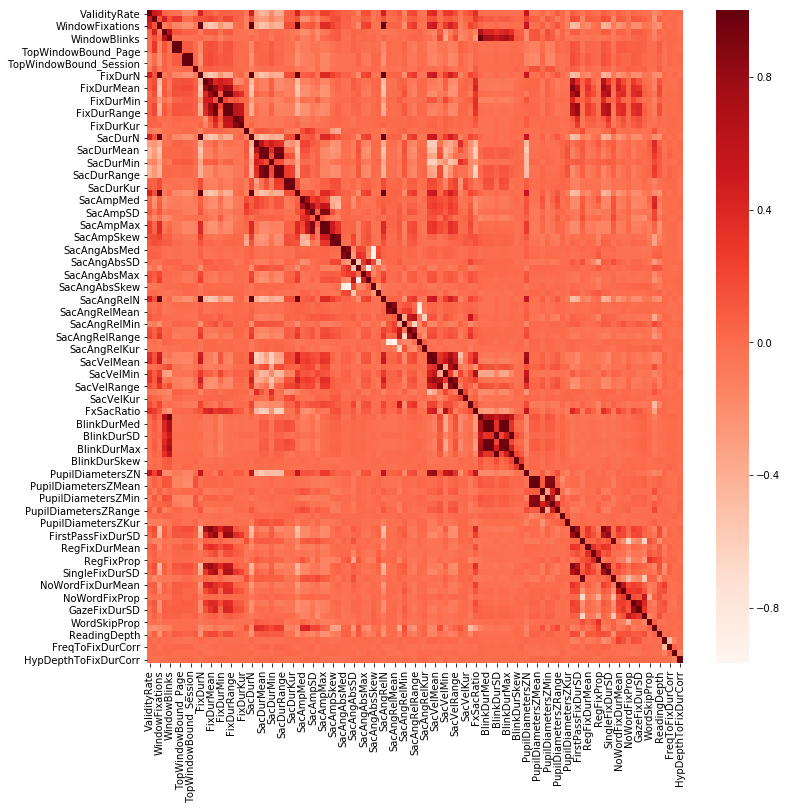

In [60]:
corr_matrix = d.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, cmap=plt.cm.Reds)

In [61]:
#corr_matrix = d.corr()
corr_matrix = d.corr().abs()

In [62]:
# mask out all the diagnol and lower triangle values
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)
upper = corr_matrix.where(mask)

# sort and display
pd.set_option('display.multi_sparse', False)
corr_pairs = upper.stack().sort_values(ascending=False)
print(corr_pairs)

SacDurN                    SacAngRelN                1.000000
BottomWindowBound_Page     TopWindowBound_Page       1.000000
BottomWindowBound_Session  TopWindowBound_Session    1.000000
SacDurN                    SacAmpN                   0.999846
SacAmpN                    SacAngRelN                0.999846
BlinkDurMed                BlinkDurMean              0.999096
FixDurN                    SacAngRelN                0.999029
FixDurN                    SacDurN                   0.999029
FixDurN                    SacAmpN                   0.998929
WindowFixations            FixDurN                   0.997983
WindowFixations            SacAmpN                   0.994585
WindowFixations            SacAngRelN                0.994548
WindowFixations            SacDurN                   0.994548
WindowBlinks               BlinkDurN                 0.992233
PupilDiametersZMed         PupilDiametersZMean       0.990568
BlinkDurMed                BlinkDurMin               0.989832
BlinkDur

**SKLearn Filtering**

In [63]:
# may need to move this, maybe even before start examining features

# split out the features that are related to the label
label_cols = ['NumberOfReports', 'FirstReportType', 'FirstReportContent']
labels = d[label_cols]
print(labels.shape)

features = d.drop(columns=label_cols)
print(features.shape)
print(features.dtypes)

(4076, 3)
(4076, 104)
ValidityRate                 float64
PageFixations                  int64
WindowFixations                int64
PageBlinks                     int64
WindowBlinks                   int64
BottomWindowBound_Page         int64
TopWindowBound_Page            int64
BottomWindowBound_Session      int64
TopWindowBound_Session         int64
FixDurN                        int64
FixDurMed                    float64
FixDurMean                   float64
FixDurSD                     float64
FixDurMin                      int64
FixDurMax                      int64
FixDurRange                  float64
FixDurSkew                   float64
FixDurKur                    float64
FxDisp                       float64
SacDurN                        int64
SacDurMed                    float64
SacDurMean                   float64
SacDurSD                     float64
SacDurMin                      int64
SacDurMax                    float64
SacDurRange                    int64
SacDurSkew      

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = features.values
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(4076, 104)


In [65]:
label = (labels.NumberOfReports > 0).astype(int)
y = label.values
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(4076,)


In [66]:
# the SelectKBest is not currently working, need to check, message about the input features need to be non negative.
# may want to normalize the features anyway before doing feature selection...

#test = SelectKBest(score_func=chi2, k=10)

#fit = test.fit(X, y)

#np.set_printoptions(precision=3)
#print(fit.scores_)

#features = fit.transform(X)

#print(features[0:5, :])

In [67]:
# this iterative approach using Recursive Feature Elimination (RFE) is working

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
num_trials, num_features = X.shape
n = int(0.25 * num_features) # percent of features to select
rfe = RFE(model, n)
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
cols = fit.support_
print("Selected Features: %s" % (cols))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 26
Selected Features: [False  True False False False False False False False False  True  True
  True  True  True  True False False False False False  True False False
 False False False False False  True  True  True False  True  True False
 False False  True False False False False False False False  True  True
 False False False False False False False False False False False False
 False False False False False  True  True False  True  True False False
 False  True False False False False False False False False  True False
 False  True  True False False False False False False False  True  True
 False False False False False False False False]
Feature Ranking: [50  1 30 20 65 10 11  8  7 28  1  1  1  1  1  1 68 70 77 23 12  1 22 35
  6  9 52 38 24  1  1  1 49  1  1 69 61  3  1 43 26 17 21 46 73 25  1  1
 16 48 14 13 47 72 39 37 41 34 75 36 63 54 64 18 67  1  1 58  1  1 44 59
 62  1 27 29 71 33 31 51 45 40  1 32 56  1  1 66 15 19 60  5  4 53  1  1
 55 42 76  2 79 78 57

In [68]:
print(features.columns[cols])

Index(['PageFixations', 'FixDurMed', 'FixDurMean', 'FixDurSD', 'FixDurMin',
       'FixDurMax', 'FixDurRange', 'SacDurMean', 'SacAmpMed', 'SacAmpMean',
       'SacAmpSD', 'SacAmpMax', 'SacAmpRange', 'SacAngAbsMean', 'SacAngRelMed',
       'SacAngRelMean', 'BlinkDurMed', 'BlinkDurMean', 'BlinkDurMin',
       'BlinkDurMax', 'PupilDiametersZN', 'FirstPassFixDurMean',
       'RegFixDurMean', 'RegFixDurSD', 'GazeFixDurMean', 'GazeFixDurSD'],
      dtype='object')


In [69]:
from sklearn.model_selection import train_test_split
num_trials, num_features = X.shape

# we can look at the score on the simple logistic regression prediction as a function of the number of features
# to get a feel for optimum number of features to use in model
scores = []
for n in range(1, num_features+1):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    
    model = LogisticRegression(solver='liblinear')
    rfe = RFE(model, n)
    
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    
    model.fit(X_train_rfe, y_train)
    score = model.score(X_test_rfe, y_test)
    
    scores.append((n, score))
    
    print('num_features: %d   score: %f' % (n, score))

num_features: 1   score: 0.729146
num_features: 2   score: 0.730128
num_features: 3   score: 0.729146
num_features: 4   score: 0.730128
num_features: 5   score: 0.731109
num_features: 6   score: 0.730128
num_features: 7   score: 0.733072
num_features: 8   score: 0.732090
num_features: 9   score: 0.734053
num_features: 10   score: 0.735034
num_features: 11   score: 0.733072
num_features: 12   score: 0.733072
num_features: 13   score: 0.733072
num_features: 14   score: 0.734053
num_features: 15   score: 0.733072
num_features: 16   score: 0.733072
num_features: 17   score: 0.735034
num_features: 18   score: 0.735034
num_features: 19   score: 0.735034
num_features: 20   score: 0.734053
num_features: 21   score: 0.734053
num_features: 22   score: 0.734053
num_features: 23   score: 0.733072
num_features: 24   score: 0.733072
num_features: 25   score: 0.733072
num_features: 26   score: 0.733072
num_features: 27   score: 0.734053
num_features: 28   score: 0.734053
num_features: 29   score: 0.7

This is not really telling us anything, not doing any better than just always guessing 0 (no mind wandering), e.g.
if you always guess 0, you expect to get the following score.

We may need to do both oversampling and feature normalization here before we start doing these iterative feature
selection methods.

In [70]:
1.0 - (sum(y) / num_trials)

0.7269381746810599

# Feature Scaling and Oversampling

Lets come back to feature selection.  Lets first normalize the features.  Also lets see if we can build
some training sets using oversampling.  Then we will try and iterate feature selection.

[Rescaling Data for Machine Learning in Python with Scikit-Learn](https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/)

**Scaling**

In [71]:
from sklearn import preprocessing

In [72]:
np.set_printoptions(precision=4, suppress=True)
m = X.mean(axis=0)
print(m)
s = X.std(axis=0)
print(s)

[     0.8297     87.4394     12.2024      4.8027      0.6575  12857.3042
  16857.3042 775243.2866 779243.2866     12.1806    219.4039    244.0341
    108.7876    122.5037    476.4293    351.6395      0.9962      1.2986
      0.4779     11.1658     29.3257     65.327      87.8175     11.5123
    264.6649    258.8624      1.9565      4.1858     11.1676    163.2883
    245.569     234.5303     69.2238    802.6008    735.1318      1.9993
      4.3026    201.6002    194.1444    144.685       7.242     356.7438
    349.9653     -0.1564     -1.2111     10.1658    178.1065    178.9708
    175.5154      2.9613    356.9881    353.7833      0.0191     -2.1268
      8.1407      8.2441      4.0329      2.0511     14.9395     12.8884
      0.1329      0.272       0.9649      6.5934      0.6455     71.7631
     71.9695      4.8916     68.2498     75.962       7.7122      0.0093
      0.0069    287.5206     -0.3158     -0.312       0.3972     -1.1355
      0.5571      1.6925      0.0733     -0.236    

In [73]:
X_norm = preprocessing.scale(X)
#X_norm = preprocessing.normalize(X)

m = X_norm.mean(axis=0)
print(m)
s = X_norm.std(axis=0)
print(s)

[-0.  0.  0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0. -0. -0.
 -0. -0. -0.  0.  0.  0. -0. -0.  0. -0. -0.  0.  0. -0. -0.  0.  0.  0.
 -0.  0. -0.  0.  0. -0. -0.  0. -0. -0.  0.  0.  0.  0. -0. -0.  0.  0.
 -0. -0.  0. -0. -0.  0.  0.  0.  0. -0. -0.  0. -0. -0.  0.  0.  0.  0.
 -0.  0. -0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.  0.  0.  0.
 -0. -0.  0. -0. -0.  0. -0. -0.  0.  0.  0.  0. -0.  0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [74]:
X_norm.max(axis=0)

array([ 1.022 ,  6.8227,  3.0601,  7.0253,  5.9813, 10.229 , 10.229 ,
        4.5158,  4.5158,  3.055 ,  6.7502,  6.5655,  8.0563,  5.6702,
        7.6314,  6.0274,  3.3854,  4.1431,  3.5937,  3.0449, 14.4192,
        8.3373,  9.2207, 10.9335,  7.6428,  7.6136,  2.3661,  3.0044,
        3.0476, 12.3875,  7.5697,  3.4421,  7.4557,  2.295 ,  2.2243,
        2.1764,  2.8848,  1.6592,  2.982 ,  2.7073,  6.6579,  0.2718,
        0.3639,  4.0724,  6.5899,  3.0449,  1.2264,  4.4033,  2.6032,
       34.5037,  0.2918,  0.371 ,  3.8586,  6.7272,  2.716 ,  2.8368,
        4.971 ,  4.3615,  5.9648,  5.8856,  3.4752,  5.451 ,  0.4578,
       12.725 ,  6.0748,  3.62  ,  3.6116, 11.6919,  3.8065,  3.3501,
       10.4635,  7.9945, 17.2889,  1.3497,  3.7908,  4.2155,  6.0792,
        4.375 ,  7.3787,  8.5439,  5.1189, 10.7633,  5.8074,  8.3188,
        1.792 , 12.0096, 11.8305,  5.7123,  8.3802,  8.5196,  2.0459,
       10.6819, 11.9763,  5.3421, 11.1482, 15.3446,  4.7495, 17.6288,
        4.2399,  5.9

In [75]:
X_norm.min(axis=0)

array([ -4.7614,  -2.7364,  -2.1574,  -0.9321,  -0.7361,  -2.3755,
        -2.3755,  -1.3601,  -1.3601,  -2.1409,  -2.2327,  -2.1733,
        -1.3576,  -1.3956,  -1.588 ,  -1.6221,  -4.3321,  -1.64  ,
        -2.9186,  -2.1252,  -0.8296,  -0.9272,  -0.8199,  -0.4831,
        -0.9491,  -0.9169,  -5.3599,  -1.9233,  -2.1281,  -2.2165,
        -2.845 ,  -3.1346,  -2.7302,  -3.5254,  -3.4865,  -5.0671,
        -1.9615,  -2.1176,  -3.5327,  -4.2448,  -0.2643, -14.2854,
        -6.5647,  -3.8165,  -2.1437,  -2.1252,  -1.1983,  -4.4175,
       -14.8806,  -0.2983, -32.4406, -21.0845,  -3.9177,  -3.2071,
        -2.5207,  -2.7307,  -2.7525,  -0.8891,  -3.1959,  -2.7474,
        -3.0169,  -2.167 ,  -7.6945,  -1.4448,  -0.7323,  -0.7915,
        -0.7924,  -0.276 ,  -0.7831,  -0.7853,  -0.2761,  -6.252 ,
       -20.7992,  -1.9881,  -3.6132,  -3.4115,  -1.8826,  -3.8508,
        -3.3545,  -2.1205,  -5.0906,  -1.6858,  -2.3017,  -1.5992,
        -4.6673,  -1.4591,  -0.9899,  -1.2154,  -2.3493,  -1.4

**Oversampling**

[The Right Way to Oversample in Predictive Modeling](https://beckernick.github.io/oversampling-modeling/)

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
# correct way to oversample, first split into train/test(validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state=12)

# then oversample only from our training data
sm = SMOTE(random_state=12, ratio=0.7) # 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [78]:
# ratio of 1 (wandering) labels to 0 (not wandering)
print(y_train_res.sum() / y_train.shape[0])

print(y_train.sum() / y_train.shape[0])
print(y_val.sum() / y_val.shape[0])

0.5086686293752044
0.27314360484134775
0.2728164867517174


In [79]:
print(X_train_res.shape)
print(y_train_res.shape)

(3777, 104)
(3777,)


In [97]:
# ok, now what do we see if we try iterative feature selection...
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
num_trials, num_features = X.shape

# we can look at the score on the simple logistic regression prediction as a function of the number of features
# to get a feel for optimum number of features to use in model
scores_df = pd.DataFrame(index=np.arange(1, 2*num_features+1),
                         columns=['num_features', 'score', 'recall', 'data'])

for n in range(1, num_features+1):
    
    model = LogisticRegression(solver='liblinear')
    rfe = RFE(model, n)
    
    X_train_rfe = rfe.fit_transform(X_train_res, y_train_res)
    X_val_rfe = rfe.transform(X_val)
    
    model.fit(X_train_rfe, y_train_res)
    
    train_score = model.score(X_train_rfe, y_train_res)
    train_recall = recall_score(y_train_res, model.predict(X_train_rfe))
    scores_df.loc[n] = ([n, train_score, train_recall, 'training'])
    
    val_score = model.score(X_val_rfe, y_val)
    val_recall = recall_score(y_val, model.predict(X_val_rfe))
    scores_df.loc[n + num_features] = ([n, val_score, val_recall, 'validation'])
    
    print('num_features: %d   train score: %f train recall: %f   val score: %f  val recall: %f' % 
          (n, train_score, train_recall, val_score, val_recall))
    
scores_df = scores_df.astype(dtype={'num_features': 'int64', 'score': 'float64', 'recall': 'float64'})


num_features: 1   train score: 0.588298 train recall: 0.000000   val score: 0.727184  val recall: 0.000000
num_features: 2   train score: 0.588298 train recall: 0.000000   val score: 0.727184  val recall: 0.000000
num_features: 3   train score: 0.588562 train recall: 0.001286   val score: 0.727184  val recall: 0.000000
num_features: 4   train score: 0.588562 train recall: 0.000643   val score: 0.727184  val recall: 0.000000
num_features: 5   train score: 0.588827 train recall: 0.010289   val score: 0.724239  val recall: 0.003597
num_features: 6   train score: 0.601006 train recall: 0.069453   val score: 0.728165  val recall: 0.089928
num_features: 7   train score: 0.590151 train recall: 0.099035   val score: 0.710500  val recall: 0.111511
num_features: 8   train score: 0.591475 train recall: 0.108682   val score: 0.712463  val recall: 0.115108
num_features: 9   train score: 0.589092 train recall: 0.130547   val score: 0.697743  val recall: 0.122302
num_features: 10   train score: 0.597

num_features: 77   train score: 0.610273 train recall: 0.198714   val score: 0.721295  val recall: 0.215827
num_features: 78   train score: 0.603918 train recall: 0.158842   val score: 0.719333  val recall: 0.176259
num_features: 79   train score: 0.603918 train recall: 0.158842   val score: 0.719333  val recall: 0.176259
num_features: 80   train score: 0.610273 train recall: 0.198714   val score: 0.721295  val recall: 0.215827
num_features: 81   train score: 0.609743 train recall: 0.196141   val score: 0.721295  val recall: 0.215827
num_features: 82   train score: 0.604183 train recall: 0.159486   val score: 0.718351  val recall: 0.172662
num_features: 83   train score: 0.610008 train recall: 0.196785   val score: 0.721295  val recall: 0.215827
num_features: 84   train score: 0.603918 train recall: 0.158842   val score: 0.718351  val recall: 0.172662
num_features: 85   train score: 0.603918 train recall: 0.158842   val score: 0.718351  val recall: 0.172662
num_features: 86   train sco

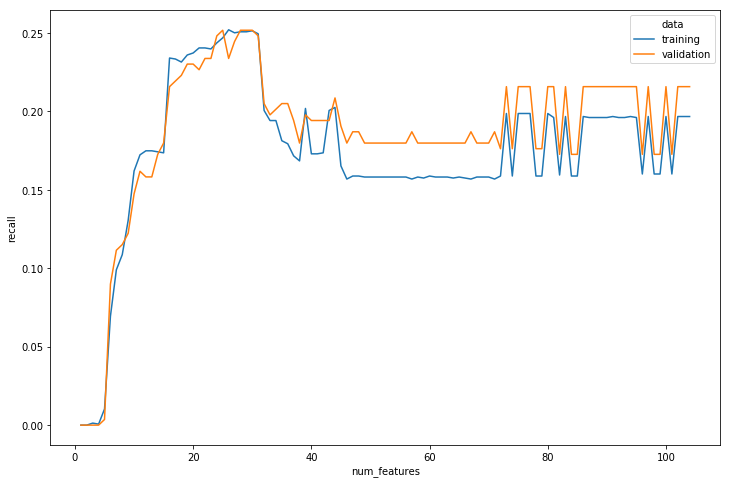

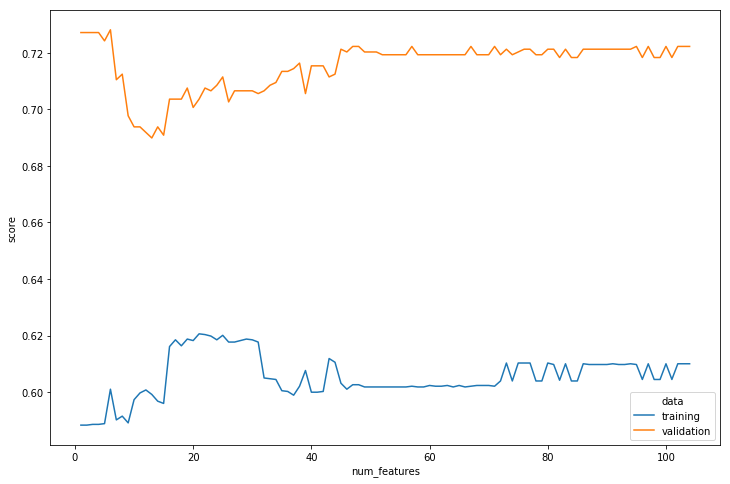

In [98]:
plt.figure(figsize=(12,8))
sns.lineplot(x='num_features', y='recall', hue='data', data=scores_df); 

plt.figure(figsize=(12,8))
sns.lineplot(x='num_features', y='score', hue='data', data=scores_df); 
